In [1]:
import kagglehub, os

path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")
print("Dataset root:", path)
print("Contents:", os.listdir(path))

root_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = root_dir + "/train"
valid_dir = root_dir + "/valid"
test_dir = "/kaggle/input/new-plant-diseases-dataset/test/test"
diseases_classes = os.listdir(train_dir)
print(str(diseases_classes))

Dataset root: /kaggle/input/new-plant-diseases-dataset
Contents: ['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch = 64

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1, height_shift_range=0.1,
    zoom_range=0.2, horizontal_flip=True
)

valid_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    os.path.join(root_dir, 'train'),
    target_size=img_size,
    batch_size=batch,
    class_mode='categorical',
    shuffle=True
)

val_ds = valid_gen.flow_from_directory(
    os.path.join(root_dir, 'valid'),
    target_size=img_size,
    batch_size=batch,
    class_mode='categorical',
    shuffle=False
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

def build_cnn(input_shape=(*img_size, 3), num_classes=38):
    model = Sequential()
    for filters in [32, 64, 128]:
        model.add(Conv2D(filters, 3, padding='same', activation='relu', input_shape=input_shape))
        model.add(Conv2D(filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D())
        model.add(Dropout(0.25))
        input_shape = None  # only in first layer

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_cnn(input_shape=(*img_size, 3), num_classes=train_ds.num_classes)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,085,126 (65.17 MB)

 Trainable params: 17,084,678 (65.17 MB)

 Non-trainable params: 448 (1.75 KB)

In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-6, verbose=1),
    EarlyStopping(patience=7, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 816s 728ms/step - accuracy: 0.3249 - loss: 2.6506 - val_accuracy: 0.5772 - val_loss: 2.1967 - learning_rate: 1.0000e-04
Epoch 2/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 391s 355ms/step - accuracy: 0.6659 - loss: 1.1422 - val_accuracy: 0.6681 - val_loss: 1.9504 - learning_rate: 1.0000e-04
Epoch 3/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 392s 356ms/step - accuracy: 0.7634 - loss: 0.8020 - val_accuracy: 0.6629 - val_loss: 2.0966 - learning_rate: 1.0000e-04
Epoch 4/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 391s 356ms/step - accuracy: 0.8173 - loss: 0.6099 - val_accuracy: 0.6661 - val_loss: 2.1437 - learning_rate: 1.0000e-04
Epoch 5/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 393s 357ms/step - accuracy: 0.8527 - loss: 0.4937 - val_accuracy: 0.7407 - val_loss: 1.6060 - learning_rate: 1.0000e-04
Epoch 6/15
1099/1099 ━━━━━━━━━━━━━━━━━━━━ 391s 356ms/step - accuracy: 0.8787 - loss: 0.4016 - val_accuracy: 0.6960 - val_loss: 2.4095 - learning_rate: 1.0000e-04
Epoch 7/15
1099/1099 ━━━━━━━

I stopped it early due to the excessive amount of time it takes for each epoch-relatively stayed consistent with 0.95

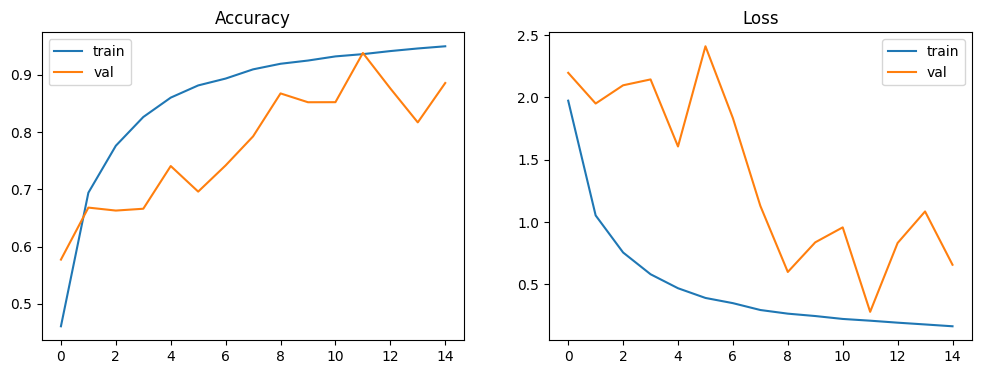

Validation accuracy: 88.58%


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend(); plt.title('Loss')
plt.show()

print("Validation accuracy: %.2f%%" % (history.history['val_accuracy'][-1]*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━

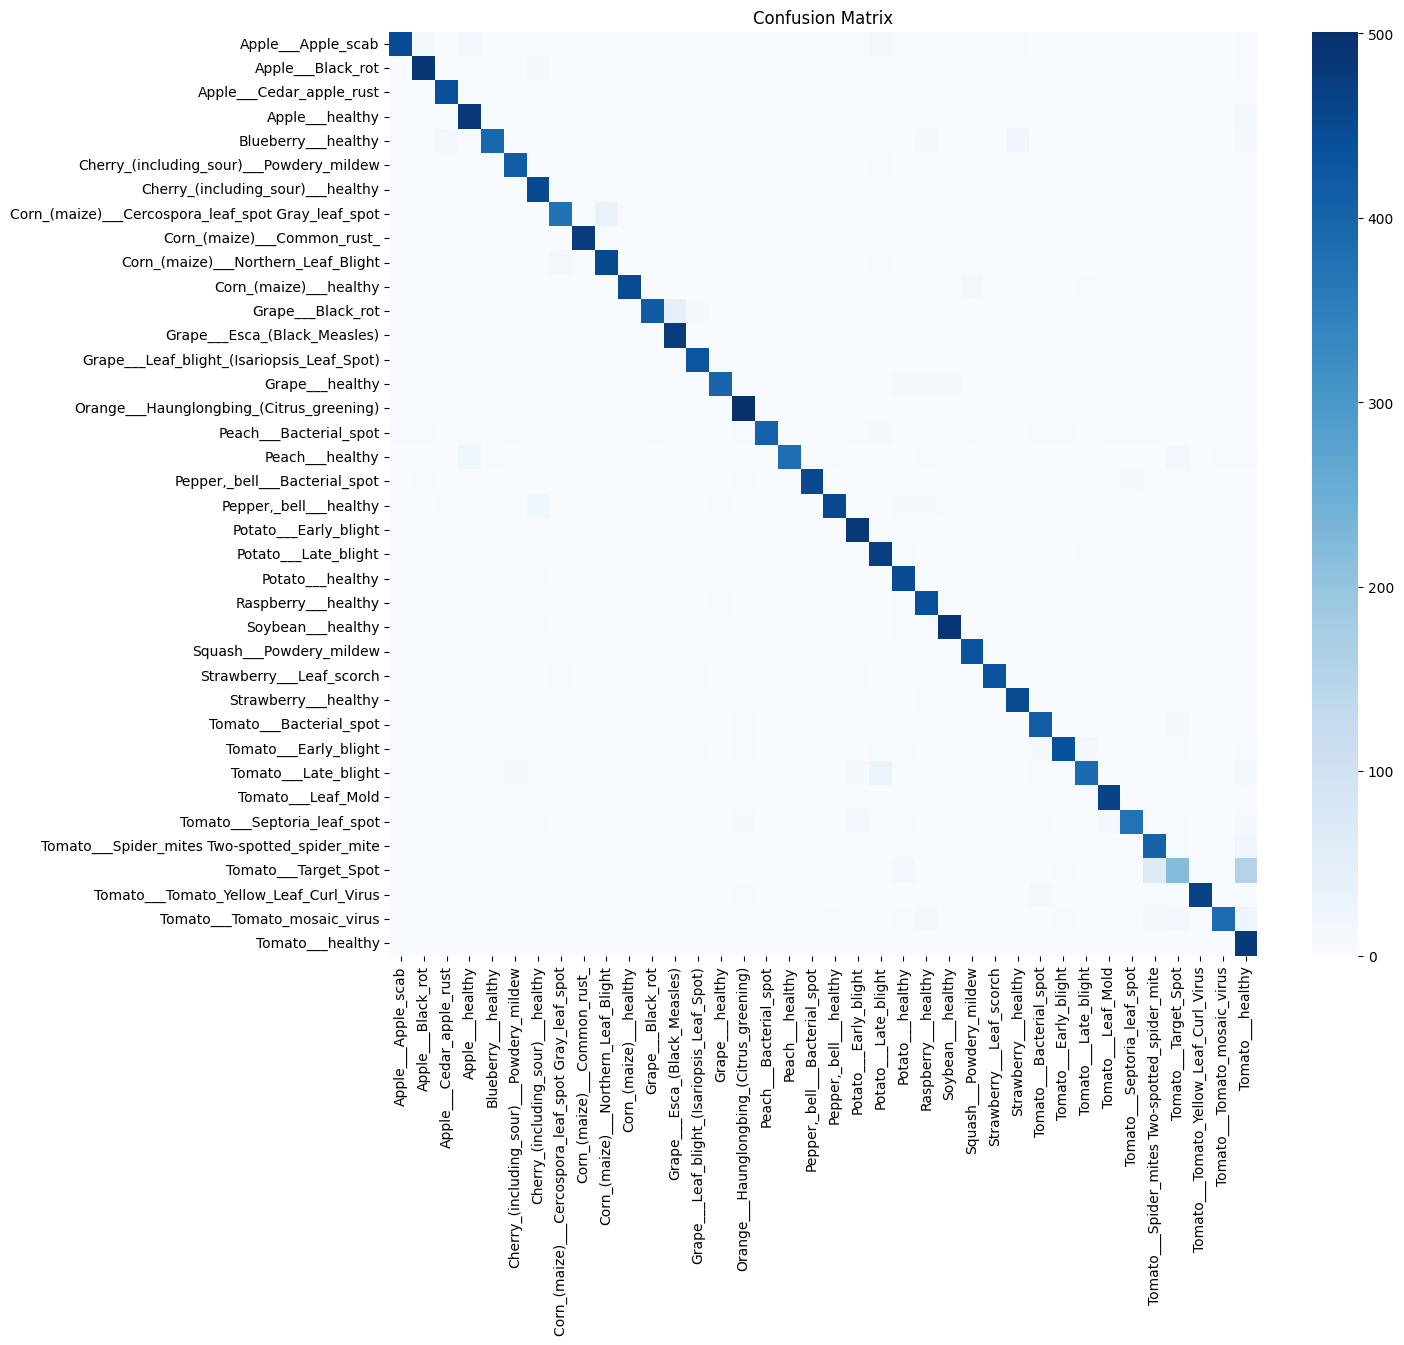

Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.89      0.94       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.97      1.00      0.98       440
                                   Apple___healthy       0.93      0.96      0.94       502
                               Blueberry___healthy       0.98      0.87      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.92      1.00      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.95

In [6]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_true, y_pred = [], []
for imgs, labels in val_ds:
    preds = model.predict(imgs)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    if len(y_true) >= val_ds.samples:
        break

labels = list(val_ds.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.xticks(rotation=90); plt.yticks(rotation=0)
plt.title("Confusion Matrix")
plt.show()

print("Report:")
print(classification_report(y_true, y_pred, target_names=labels))